In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
voice_train = pd.read_pickle("./audio_tables/voice_train_split_df")
voice_train

,Unnamed: 0,A,D,F,H,N,S,fileName,numResponses,agreement,...,meanEmoRespNorm,meanAngerRespNorm,meanDisgustRespNorm,meanFearRespNorm,meanHappyRespNorm,meanNeutralRespNorm,meanSadRespNorm,medianEmoRespNorm,intendedEmo,voiceVote
588,100589,0,5,0,0,0,4,1008_IEO_DIS_HI,9,0.555556,...,55.790186,-1.000000,48.255774,-1.000000,-1.000000,-1.000000,65.208201,58.974359,D,D
3985,103986,0,0,4,0,2,3,1049_ITS_FEA_XX,9,0.444444,...,58.745081,-1.000000,-1.000000,70.706379,-1.000000,40.389272,55.033890,60.439560,F,F
2209,102210,0,4,3,0,2,0,1028_IEO_DIS_MD,9,0.444444,...,34.616499,-1.000000,26.332053,40.242191,-1.000000,42.746855,-1.000000,31.395349,D,D
7439,107440,5,4,0,0,0,0,1091_WSI_ANG_XX,9,0.555556,...,44.634637,28.913787,64.285699,-1.000000,-1.000000,-1.000000,-1.000000,37.681159,A,A
2320,102321,7,0,0,1,0,0,1029_MTI_ANG_XX,8,0.875000,...,82.052019,81.371852,-1.000000,-1.000000,86.813187,-1.000000,-1.000000,84.167518,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,101133,9,1,0,0,1,0,1014_WSI_ANG_XX,11,0.818182,...,75.064337,74.963612,78.571429,-1.000000,-1.000000,72.463768,-1.000000,78.571429,A,A
883,100884,0,1,0,0,8,2,1011_WSI_NEU_XX,11,0.727273,...,51.277296,-1.000000,0.000000,-1.000000,-1.000000,63.423958,28.329298,51.428571,N,N
2028,102029,8,1,0,0,1,0,1025_WSI_ANG_XX,10,0.800000,...,52.150185,52.803014,86.956522,-1.000000,-1.000000,12.121212,-1.000000,58.007705,A,A
5222,105223,1,4,2,0,1,0,1064_TSI_DIS_XX,8,0.500000,...,41.307659,32.467532,48.717186,26.562500,-1.000000,50.000000,-1.000000,43.750000,D,D


In [3]:
combined_voice_votes_correct = pd.read_pickle("./combined_voice_votes_correct")
combined_voice_votes_incorrect = pd.read_pickle("./combined_voice_votes_incorrect")

In [4]:
combined_voice_votes_correct

,Unnamed: 0,A,D,F,H,N,S,fileName,numResponses,agreement,...,meanEmoRespNorm,meanAngerRespNorm,meanDisgustRespNorm,meanFearRespNorm,meanHappyRespNorm,meanNeutralRespNorm,meanSadRespNorm,medianEmoRespNorm,intendedEmo,voiceVote
0,100001,0,0,0,1,10,0,1001_IEO_NEU_XX,11,0.909091,...,66.171320,-1.000000,-1.000000,-1.000000,97.894737,62.998978,-1.000000,83.333333,N,N
3,100004,2,0,0,6,2,0,1001_IEO_HAP_HI,10,0.600000,...,52.927309,84.420185,-1.000000,-1.000000,56.542708,10.588235,-1.000000,66.308140,H,H
11,100012,0,3,5,0,3,0,1001_IEO_FEA_MD,11,0.454545,...,53.866669,-1.000000,36.901933,65.988537,-1.000000,50.628292,-1.000000,52.857143,F,F
16,100017,0,0,0,0,10,0,1001_TIE_NEU_XX,10,1.000000,...,77.592125,-1.000000,-1.000000,-1.000000,-1.000000,77.592125,-1.000000,82.497013,N,N
19,100020,5,4,0,0,2,0,1001_TIE_ANG_XX,11,0.454545,...,47.424031,45.974055,29.496135,-1.000000,-1.000000,86.904762,-1.000000,49.484536,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7430,107431,1,0,2,0,3,1,1091_TSI_NEU_XX,7,0.428571,...,54.098765,27.118644,-1.000000,66.303030,-1.000000,68.086922,14.705882,54.878049,N,N
7433,107434,4,3,1,0,1,0,1091_TSI_ANG_XX,9,0.444444,...,68.091134,68.093439,74.709079,59.740260,-1.000000,56.578947,-1.000000,68.181818,A,A
7434,107435,0,0,7,0,3,0,1091_TSI_FEA_XX,10,0.700000,...,57.933607,-1.000000,-1.000000,57.700428,-1.000000,58.477694,-1.000000,52.383207,F,F
7436,107437,1,0,0,0,8,0,1091_WSI_NEU_XX,9,0.888889,...,51.064896,6.451613,-1.000000,-1.000000,-1.000000,56.641556,-1.000000,53.535354,N,N


In [5]:
combined_voice_votes_incorrect

,Unnamed: 0,A,D,F,H,N,S,fileName,numResponses,agreement,...,meanEmoRespNorm,meanAngerRespNorm,meanDisgustRespNorm,meanFearRespNorm,meanHappyRespNorm,meanNeutralRespNorm,meanSadRespNorm,medianEmoRespNorm,intendedEmo,voiceVote
1,100002,0,0,0,3,6,0,1001_IEO_HAP_LO,9,0.666667,...,53.816160,-1.000000,-1.000000,-1.000000,36.292735,62.577873,-1.000000,53.846154,H,N
2,100003,0,0,0,4,7,0,1001_IEO_HAP_MD,11,0.636364,...,61.874713,-1.000000,-1.000000,-1.000000,55.165230,65.708703,-1.000000,61.111111,H,N
4,100005,1,1,0,0,7,1,1001_IEO_SAD_LO,10,0.700000,...,59.486728,12.941176,94.936709,-1.000000,-1.000000,69.123485,3.125000,75.182073,S,N
5,100006,0,1,1,0,8,0,1001_IEO_SAD_MD,10,0.800000,...,35.346789,-1.000000,49.056604,2.298851,-1.000000,37.764055,-1.000000,36.333907,S,N
6,100007,1,0,0,1,7,0,1001_IEO_SAD_HI,9,0.777778,...,46.297591,0.000000,-1.000000,-1.000000,27.835052,55.549038,-1.000000,50.649351,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,107436,0,0,2,0,6,1,1091_TSI_DIS_XX,9,0.666667,...,46.321250,-1.000000,-1.000000,49.353279,-1.000000,40.285684,76.470588,50.537634,D,N
7437,107438,0,2,0,0,8,0,1091_WSI_HAP_XX,10,0.800000,...,56.332423,-1.000000,28.005244,-1.000000,-1.000000,63.414218,-1.000000,52.568042,H,N
7438,107439,0,0,1,0,6,3,1091_WSI_SAD_XX,10,0.600000,...,41.362104,-1.000000,-1.000000,21.428571,-1.000000,52.885281,24.960261,28.413347,S,N
7440,107441,0,1,2,0,2,3,1091_WSI_FEA_XX,8,0.375000,...,27.568680,-1.000000,3.370787,48.840970,-1.000000,39.970995,13.184907,32.863888,F,S


Agreement is NOT accuracy

In [6]:
combined_face_votes_correct = pd.read_pickle("./combined_face_votes_correct")
combined_face_votes_incorrect = pd.read_pickle("./combined_face_votes_incorrect")

In [7]:
(sum(combined_face_votes_correct.numResponses*combined_face_votes_correct.agreement)+sum(combined_face_votes_incorrect.numResponses*combined_face_votes_incorrect.agreement))/(sum(combined_face_votes_correct.numResponses)+sum(combined_face_votes_incorrect.numResponses))

0.7019845368018534

In [8]:
FINISHED_RESPONSES_PATH = "./CREMA-D/finishedResponses.csv"
finished_responses_df = pd.read_csv(FINISHED_RESPONSES_PATH)
finished_responses_df

/tmp/ipykernel_2285501/3677626154.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  finished_responses_df = pd.read_csv(FINISHED_RESPONSES_PATH)


,Unnamed: 0,localid,pos,ans,ttr,queryType,numTries,clipNum,questNum,subType,clipName,sessionNums,respEmo,respLevel,dispEmo,dispVal,dispLevel
0,13,SSI_1090000584,13,N_58,14516,1,0,768,1,4,1010_MTI_SAD_XX,1,N,58,S,50.0,X
1,17,SSI_1090000584,17,H_39,6977,1,0,2981,2,4,1037_IWL_HAP_XX,1,H,39,H,50.0,X
2,21,SSI_1090000584,21,S_79,5760,1,0,1736,3,4,1022_IWW_FEA_XX,1,S,79,F,50.0,X
3,25,SSI_1090000584,25,F_40,10512,1,0,5471,4,4,1067_WSI_HAP_XX,1,F,40,H,50.0,X
4,29,SSI_1090000584,29,N_88,6911,1,0,21,5,4,1001_TIE_FEA_XX,1,N,88,F,50.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219683,1100027,SSI_1089998356,405,S_53,3578,3,0,1560,29,4,1020_TIE_FEA_XX,14766,S,53,F,50.0,X
219684,1100031,SSI_1089998356,409,H_15,6235,3,0,3303,30,4,1041_MTI_HAP_XX,14766,H,15,H,50.0,X
219685,1100035,SSI_1089998356,413,S_65,4656,3,0,4548,31,4,1056_ITH_FEA_XX,14766,S,65,F,50.0,X
219686,1100039,SSI_1089998356,417,D_69,3875,3,0,7287,32,4,1090_IEO_ANG_MD,14766,D,69,A,50.0,M


In [9]:
len(finished_responses_df.localid.unique())

2443

In [10]:
participant_reponses_voice = finished_responses_df.loc[finished_responses_df.queryType==1]
participant_reponses_voice

,Unnamed: 0,localid,pos,ans,ttr,queryType,numTries,clipNum,questNum,subType,clipName,sessionNums,respEmo,respLevel,dispEmo,dispVal,dispLevel
0,13,SSI_1090000584,13,N_58,14516,1,0,768,1,4,1010_MTI_SAD_XX,1,N,58,S,50.0,X
1,17,SSI_1090000584,17,H_39,6977,1,0,2981,2,4,1037_IWL_HAP_XX,1,H,39,H,50.0,X
2,21,SSI_1090000584,21,S_79,5760,1,0,1736,3,4,1022_IWW_FEA_XX,1,S,79,F,50.0,X
3,25,SSI_1090000584,25,F_40,10512,1,0,5471,4,4,1067_WSI_HAP_XX,1,F,40,H,50.0,X
4,29,SSI_1090000584,29,N_88,6911,1,0,21,5,4,1001_TIE_FEA_XX,1,N,88,F,50.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219623,1099747,SSI_1089998356,125,N_80,3281,1,0,508,29,4,1007_TIE_NEU_XX,14766,N,80,N,50.0,X
219624,1099751,SSI_1089998356,129,D_19,10844,1,0,4741,30,4,1059_IEO_HAP_HI,14766,D,19,H,80.0,H
219625,1099755,SSI_1089998356,133,N_67,9094,1,0,6235,31,4,1077_IOM_NEU_XX,14766,N,67,N,50.0,X
219626,1099759,SSI_1089998356,137,D_32,7390,1,0,2749,32,4,1034_DFA_ANG_XX,14766,D,32,A,50.0,X


In [11]:
participant_reponses_voice.loc[participant_reponses_voice.localid=="SSI_1090000584"].loc[participant_reponses_voice.respEmo==participant_reponses_voice.dispEmo]

,Unnamed: 0,localid,pos,ans,ttr,queryType,numTries,clipNum,questNum,subType,clipName,sessionNums,respEmo,respLevel,dispEmo,dispVal,dispLevel
1,17,SSI_1090000584,17,H_39,6977,1,0,2981,2,4,1037_IWL_HAP_XX,1,H,39,H,50.0,X
5,33,SSI_1090000584,33,H_52,3822,1,0,1487,6,4,1019_IOM_HAP_XX,1,H,52,H,50.0,X
6,37,SSI_1090000584,37,F_36,7376,1,0,4724,7,4,1058_ITS_FEA_XX,1,F,36,F,50.0,X
8,45,SSI_1090000584,45,F_40,7474,1,0,4226,9,4,1052_DFA_FEA_XX,1,F,40,F,50.0,X
9,49,SSI_1090000584,49,F_68,7106,1,0,2234,10,4,1028_TAI_FEA_XX,1,F,68,F,50.0,X
10,53,SSI_1090000584,53,F_100,3882,1,0,5222,11,4,1064_TSI_FEA_XX,1,F,100,F,50.0,X
11,57,SSI_1090000584,57,H_63,9555,1,0,4475,12,4,1055_ITS_HAP_XX,1,H,63,H,50.0,X
14,69,SSI_1090000584,69,H_37,8769,1,0,5969,15,4,1074_IEO_HAP_LO,1,H,37,H,20.0,L
25,125,SSI_1090000584,125,H_51,8615,1,0,7214,29,4,1089_TIE_HAP_XX,1,H,51,H,50.0,X
26,129,SSI_1090000584,129,D_99,3796,1,0,6965,30,4,1086_IEO_DIS_MD,1,D,99,D,50.0,M


In [12]:

# total_matching = participant_reponses_voice.loc[participant_reponses_voice.localid=="SSI_1090000584"].loc[participant_reponses_voice.respEmo==participant_reponses_voice.dispEmo].shape(0)
# total_not_matching = participant_reponses_voice.loc[participant_reponses_voice.localid=="SSI_1090000584"].loc[participant_reponses_voice.respEmo!=participant_reponses_voice.dispEmo].shape(0)
# total = total_matching + total_not_matching

In [13]:
# participant_acc = {"participant_id":[], "participant_acc":[]}
# for participant_id in participant_reponses_voice.localid.unique():
#     total_matching = participant_reponses_voice.loc[participant_reponses_voice.localid==participant_id].loc[participant_reponses_voice.respEmo==participant_reponses_voice.dispEmo].shape[0]
#     total_not_matching = participant_reponses_voice.loc[participant_reponses_voice.localid==participant_id].loc[participant_reponses_voice.respEmo!=participant_reponses_voice.dispEmo].shape[0]
#     participant_acc["participant_id"].append(participant_id)
#     participant_acc["participant_acc"].append(total_matching/(total_matching+total_not_matching))
# np.mean(participant_acc["participant_acc"])

In [14]:
len(participant_reponses_voice.loc[participant_reponses_voice.respEmo==participant_reponses_voice.dispEmo])/len(participant_reponses_voice)

0.3918693859720971

In [15]:
len(finished_responses_df.loc[finished_responses_df.queryType==2].loc[finished_responses_df.respEmo==finished_responses_df.dispEmo])/len(finished_responses_df.loc[finished_responses_df.queryType==2])

0.5685867307902503

In [16]:
finished_responses_repeats_df = pd.read_csv("./CREMA-D/finishedResponsesWithRepeatWithPractice.csv")

/tmp/ipykernel_2285501/497570708.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  finished_responses_repeats_df = pd.read_csv("./CREMA-D/finishedResponsesWithRepeatWithPractice.csv")


In [17]:
len(finished_responses_repeats_df.loc[finished_responses_repeats_df.queryType==1].loc[finished_responses_repeats_df.respEmo==finished_responses_repeats_df.dispEmo])/len(finished_responses_repeats_df.loc[finished_responses_repeats_df.queryType==1])

0.40904995377900516

## Qs:

- Should I report human accuracy using repeats (incl. repeats and practice) or no repeats?
- **My answer: w/ repeats to make the accuracy fair + this is whats reported as human accuracy in paper**
- Should I report human accuracy of matching dataset using just the the test set or the entire matching set?
    - same for non-matching
- **My answer: Just the test set for better/fair comparison**

In [18]:
finished_responses_repeats_df

,Unnamed: 0,localid,pos,ans,ttr,queryType,numTries,clipNum,questNum,subType,clipName,sessionNums,respEmo,respLevel,dispEmo,dispVal,dispLevel
0,5,SSI_1090000584,5,A_74,9740,1,0,7443,91,4,ANG_HI_practice,1,A,74,A,80.0,H
1,9,SSI_1090000584,9,S_50,10312,1,0,7444,92,4,SAD_MD_practice,1,S,50,S,50.0,M
2,13,SSI_1090000584,13,N_58,14516,1,0,768,1,4,1010_MTI_SAD_XX,1,N,58,S,50.0,X
3,17,SSI_1090000584,17,H_39,6977,1,0,2981,2,4,1037_IWL_HAP_XX,1,H,39,H,50.0,X
4,21,SSI_1090000584,21,S_79,5760,1,0,1736,3,4,1022_IWW_FEA_XX,1,S,79,F,50.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256292,1100027,SSI_1089998356,405,S_53,3578,3,0,1560,29,4,1020_TIE_FEA_XX,14766,S,53,F,50.0,X
256293,1100031,SSI_1089998356,409,H_15,6235,3,0,3303,30,4,1041_MTI_HAP_XX,14766,H,15,H,50.0,X
256294,1100035,SSI_1089998356,413,S_65,4656,3,0,4548,31,4,1056_ITH_FEA_XX,14766,S,65,F,50.0,X
256295,1100039,SSI_1089998356,417,D_69,3875,3,0,7287,32,4,1090_IEO_ANG_MD,14766,D,69,A,50.0,M


In [19]:
finished_responses_df

,Unnamed: 0,localid,pos,ans,ttr,queryType,numTries,clipNum,questNum,subType,clipName,sessionNums,respEmo,respLevel,dispEmo,dispVal,dispLevel
0,13,SSI_1090000584,13,N_58,14516,1,0,768,1,4,1010_MTI_SAD_XX,1,N,58,S,50.0,X
1,17,SSI_1090000584,17,H_39,6977,1,0,2981,2,4,1037_IWL_HAP_XX,1,H,39,H,50.0,X
2,21,SSI_1090000584,21,S_79,5760,1,0,1736,3,4,1022_IWW_FEA_XX,1,S,79,F,50.0,X
3,25,SSI_1090000584,25,F_40,10512,1,0,5471,4,4,1067_WSI_HAP_XX,1,F,40,H,50.0,X
4,29,SSI_1090000584,29,N_88,6911,1,0,21,5,4,1001_TIE_FEA_XX,1,N,88,F,50.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219683,1100027,SSI_1089998356,405,S_53,3578,3,0,1560,29,4,1020_TIE_FEA_XX,14766,S,53,F,50.0,X
219684,1100031,SSI_1089998356,409,H_15,6235,3,0,3303,30,4,1041_MTI_HAP_XX,14766,H,15,H,50.0,X
219685,1100035,SSI_1089998356,413,S_65,4656,3,0,4548,31,4,1056_ITH_FEA_XX,14766,S,65,F,50.0,X
219686,1100039,SSI_1089998356,417,D_69,3875,3,0,7287,32,4,1090_IEO_ANG_MD,14766,D,69,A,50.0,M


In [20]:
sum(combined_voice_votes_correct.numResponses)

28864

In [21]:
finished_responses_df.loc[finished_responses_df.queryType==3]#.loc[finished_responses_df.respEmo==finished_responses_df.dispEmo]

,Unnamed: 0,localid,pos,ans,ttr,queryType,numTries,clipNum,questNum,subType,clipName,sessionNums,respEmo,respLevel,dispEmo,dispVal,dispLevel
60,293,SSI_1090000584,293,F_38,3699,3,0,2041,1,4,1026_IEO_ANG_HI,1,F,38,A,80.0,H
61,297,SSI_1090000584,297,F_75,3976,3,0,5278,2,4,1065_IWL_SAD_XX,1,F,75,S,50.0,X
62,301,SSI_1090000584,301,F_85,2772,3,0,6025,3,4,1074_ITH_DIS_XX,1,F,85,D,50.0,X
63,305,SSI_1090000584,305,A_81,1797,3,0,4033,4,4,1050_IWW_DIS_XX,1,A,81,D,50.0,X
64,309,SSI_1090000584,309,N_60,3530,3,0,3286,5,4,1041_IOM_SAD_XX,1,N,60,S,50.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219683,1100027,SSI_1089998356,405,S_53,3578,3,0,1560,29,4,1020_TIE_FEA_XX,14766,S,53,F,50.0,X
219684,1100031,SSI_1089998356,409,H_15,6235,3,0,3303,30,4,1041_MTI_HAP_XX,14766,H,15,H,50.0,X
219685,1100035,SSI_1089998356,413,S_65,4656,3,0,4548,31,4,1056_ITH_FEA_XX,14766,S,65,F,50.0,X
219686,1100039,SSI_1089998356,417,D_69,3875,3,0,7287,32,4,1090_IEO_ANG_MD,14766,D,69,A,50.0,M


In [22]:
finished_responses_df[finished_responses_df.clipName.isin(["1026_IEO_ANG_HI", "1027_IEO_ANG_HI"])]

,Unnamed: 0,localid,pos,ans,ttr,queryType,numTries,clipNum,questNum,subType,clipName,sessionNums,respEmo,respLevel,dispEmo,dispVal,dispLevel
60,293,SSI_1090000584,293,F_38,3699,3,0,2041,1,4,1026_IEO_ANG_HI,1,F,38,A,80.0,H
939,4459,SSI_1160035483,192,D_89,5228,2,0,2123,10,4,1027_IEO_ANG_HI,43,D,89,A,80.0,H
1669,8133,SSI_1080077314,237,A_12,5838,2,0,2041,22,4,1026_IEO_ANG_HI,87,A,12,A,80.0,H
5774,28137,SSI_1160232926,69,A_100,8350,1,0,2123,15,4,1027_IEO_ANG_HI,303,A,100,A,80.0,H
7665,37216,SSI_1160264830,73,A_100,2762,1,0,2123,16,4,1027_IEO_ANG_HI,370,A,100,A,80.0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206530,1036336,SSI_1079470030,273,A_60,5944,2,0,2041,31,4,1026_IEO_ANG_HI,14066,A,60,A,80.0,H
210957,1057812,SSI_1099619755,361,A_98,2626,3,0,2123,18,4,1027_IEO_ANG_HI,14299,A,98,A,80.0,H
214356,1074598,SSI_1159782672,266,A_99,3938,2,0,2123,29,4,1027_IEO_ANG_HI,14507,A,99,A,80.0,H
214462,1075095,SSI_1159784757,341,A_99,3555,3,0,2123,13,4,1027_IEO_ANG_HI,14508,A,99,A,80.0,H


In [23]:
# Expects an list of clip names and query type to find the human accuracy
def human_acc_on_clips(clips, queryType, finished_responses_repeats_df):
    # dataframe rows that contain clips
    clip_responses = finished_responses_repeats_df[finished_responses_repeats_df.clipName.isin(clips)]
    return len(
        clip_responses.loc[clip_responses.queryType==queryType].loc[clip_responses.respEmo==clip_responses.dispEmo]
    )/len(clip_responses.loc[clip_responses.queryType==queryType])


# Human accuracy on voice only over whole dataset reported in paper 0.40904995377900516
human_acc_on_clips(
    list(finished_responses_repeats_df.clipName),
    1,
    finished_responses_repeats_df
)

# Human accuracy on face only over whole dataset reported in paper 0.5821173439512823
human_acc_on_clips(
    list(finished_responses_repeats_df.clipName),
    2,
    finished_responses_repeats_df
)


# Human accuracy on voice only over all mis-matched voice items (items which general pop. vote didnt match inteded)
# 0.17895566586420675
human_acc_on_clips(
    list(combined_voice_votes_incorrect.fileName),
    1,
    finished_responses_repeats_df
)

# Human accuracy on voice only over all matched voice items (items which general pop. vote did match inteded)
# 0.6908145065398336
human_acc_on_clips(
    list(combined_voice_votes_correct.fileName),
    1,
    finished_responses_repeats_df
)

# Human accuracy on face only over all mis-matched face items (items which general pop. vote didnt match inteded)
# 0.19366639568398492
human_acc_on_clips(
    list(combined_face_votes_incorrect.fileName),
    2,
    finished_responses_repeats_df
)

# Human accuracy on face only over all matched face items (items which general pop. vote did match inteded)
# 0.7586439155814998
human_acc_on_clips(
    list(combined_face_votes_correct.fileName),
    2,
    finished_responses_repeats_df
)

0.7586439155814998

In [24]:
face_matching_test = pd.read_pickle("face_test.pkl")
human_acc_on_clips(
    list(face_matching_test.fileName),
    2,
    finished_responses_repeats_df
)

0.7591022443890274

In [25]:
voice_matching_test = pd.read_pickle("./audio_tables/voice_test_split_df")
human_acc_on_clips(
    list(voice_matching_test.fileName),
    1,
    finished_responses_repeats_df
)

0.6891408114558473

### Results:

#### Human accuracy on Visual:
- Matching: 75.86%
- Non-matcing: 19.37%


#### Human accuracy on Audio:
- Matching: 69.08%
- Non-matcing: 17.90%


### Calcualte confusion matrices for human data

In [26]:
a = finished_responses_repeats_df.loc[finished_responses_repeats_df.queryType==1]
# len(a.loc[a.dispEmo == 'A'].loc[a.respEmo=='A'])/len(a.loc[a.dispEmo == 'A'])
len(a.loc[a.dispEmo == 'A'].loc[a.respEmo=='A'])

9235

In [27]:

y_true_all_voice = list(finished_responses_df.loc[finished_responses_df.queryType==1].dispEmo)
y_pred_all_voice = list(finished_responses_df.loc[finished_responses_df.queryType==1].respEmo)

target_names = list(set(y_true_all_voice))

all_voice_cm = confusion_matrix(y_true_all_voice, y_pred_all_voice, labels=target_names)
all_voice_cm

array([[3537, 5601, 1053,  417,  889,  979],
       [ 224, 8112,  561,  770,  440,  655],
       [ 380, 4818, 3922, 1733,  803,  827],
       [ 167, 6603, 1455, 3112,  251,  886],
       [ 253, 2306,  672,  143, 6496, 2714],
       [ 349, 4705, 1168, 1229, 1497, 3527]])

In [28]:
def plot_cm(trues, preds, targets, title):
    # adapted from https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix


    all_voice_cm = confusion_matrix(trues, preds, labels=targets, normalize='true')

    all_voice_cm / all_voice_cm.astype(np.float).sum(axis=1)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(all_voice_cm, annot=True, fmt='.2f', xticklabels=targets, yticklabels=targets)
    plt.ylabel('Intended Emotion')
    plt.xlabel('Predicted emotion by individual raters')
    plt.title(title)
    plt.show(block=False)

TARGET_NAMES = ["A", "D", "F", "H", "N", "S"]

/tmp/ipykernel_2285501/995340082.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_voice_cm / all_voice_cm.astype(np.float).sum(axis=1)


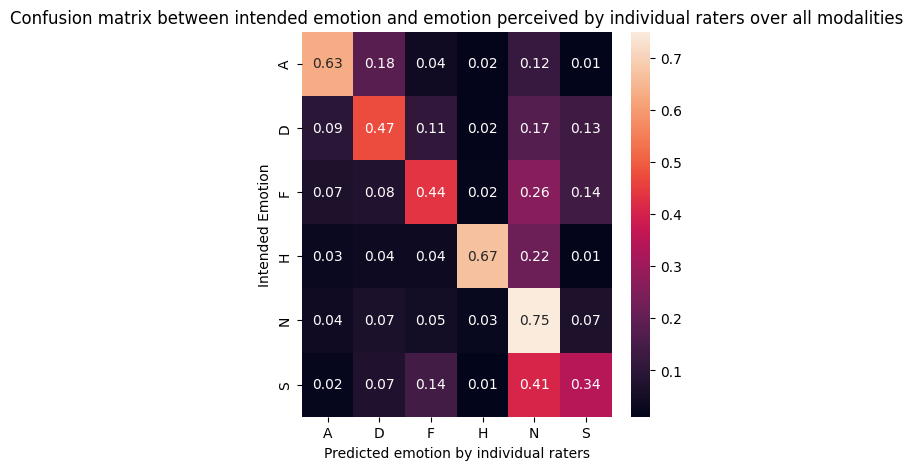

In [29]:
target_names = list(set(y_true_all_voice))
y_true_all = list(finished_responses_repeats_df.dispEmo)
y_pred_all = list(finished_responses_repeats_df.respEmo)

plot_cm(
    y_true_all,
    y_pred_all,
    TARGET_NAMES,
    "Confusion matrix between intended emotion and emotion perceived by individual raters over all modalities"
)

/tmp/ipykernel_2285501/995340082.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_voice_cm / all_voice_cm.astype(np.float).sum(axis=1)


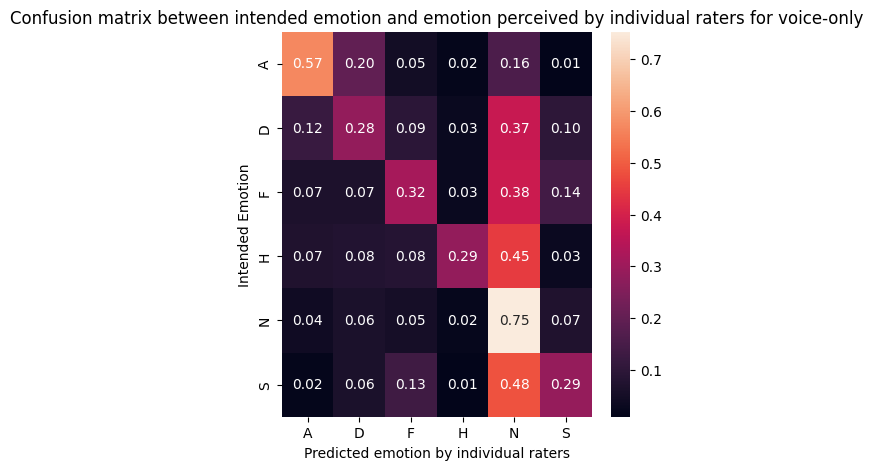

In [30]:
voice_responses = finished_responses_repeats_df.loc[finished_responses_repeats_df.queryType==1]
y_true_repeats_all_voice = list(voice_responses.dispEmo)
y_pred_repeats_all_voice = list(voice_responses.respEmo)
target_names = list(set(y_true_all_voice))


plot_cm(
    y_true_repeats_all_voice,
    y_pred_repeats_all_voice,
    TARGET_NAMES,
    "Confusion matrix between intended emotion and emotion perceived by individual raters for voice-only"
)

/tmp/ipykernel_2285501/995340082.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_voice_cm / all_voice_cm.astype(np.float).sum(axis=1)


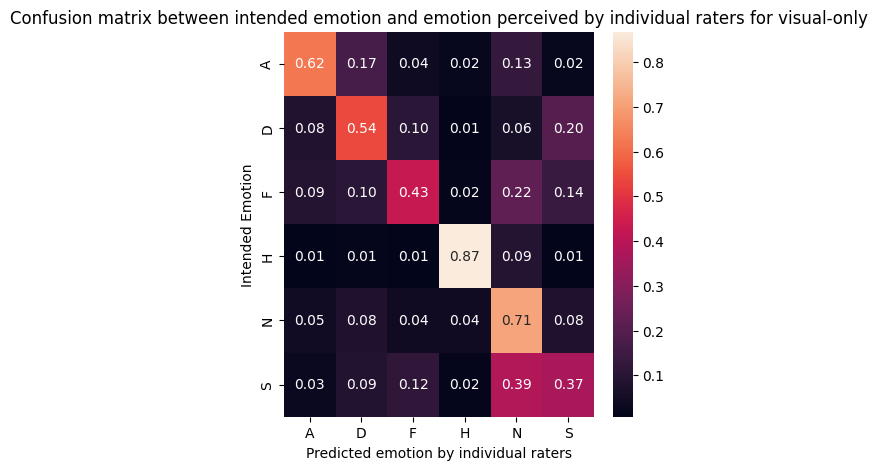

In [31]:
face_responses = finished_responses_repeats_df.loc[finished_responses_repeats_df.queryType==2]
y_true_all_face = list(face_responses.dispEmo)
y_pred_all_face = list(face_responses.respEmo)
target_names = list(set(y_true_all_voice))

plot_cm(
    y_true_all_face,
    y_pred_all_face,
    TARGET_NAMES,
    "Confusion matrix between intended emotion and emotion perceived by individual raters for visual-only"
)

/tmp/ipykernel_2285501/995340082.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_voice_cm / all_voice_cm.astype(np.float).sum(axis=1)


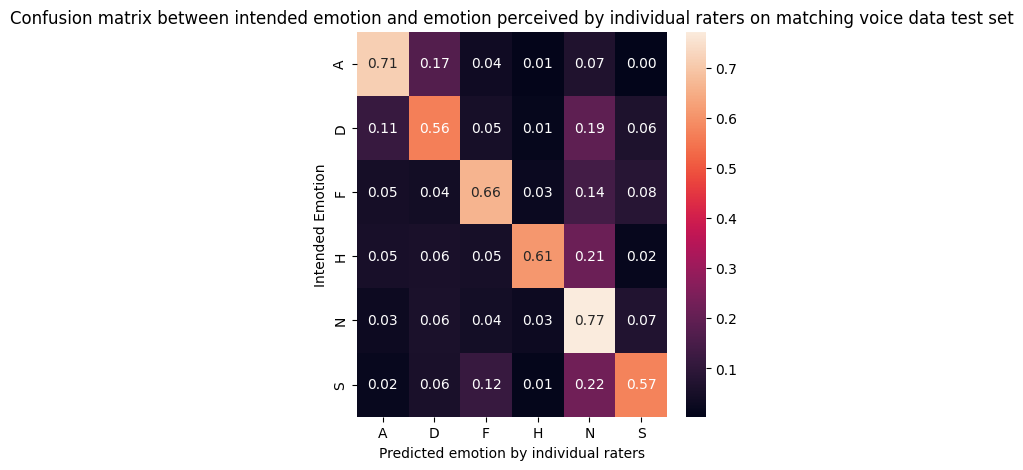

Human accuracy on matching voice data test set is 0.6891408114558473


In [32]:
voice_match_test = pd.read_pickle("./audio_tables/voice_test_split_df")
voice_match_test_files = list(voice_match_test.fileName)
voice_match_test_responses = voice_responses.loc[voice_responses.clipName.isin(voice_match_test_files)]#.dispEmo


y_true_voice_match = list(voice_match_test_responses.dispEmo)
y_pred_voice_match = list(voice_match_test_responses.respEmo)

plot_cm(
    y_true_voice_match,
    y_pred_voice_match,
    TARGET_NAMES,
    "Confusion matrix between intended emotion and emotion perceived by individual raters on matching voice data test set"
)

voice_match_test_acc = human_acc_on_clips(
    voice_match_test_files,
    1,
    finished_responses_repeats_df
)

print(f'Human accuracy on matching voice data test set is {voice_match_test_acc}')

/tmp/ipykernel_2285501/995340082.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_voice_cm / all_voice_cm.astype(np.float).sum(axis=1)


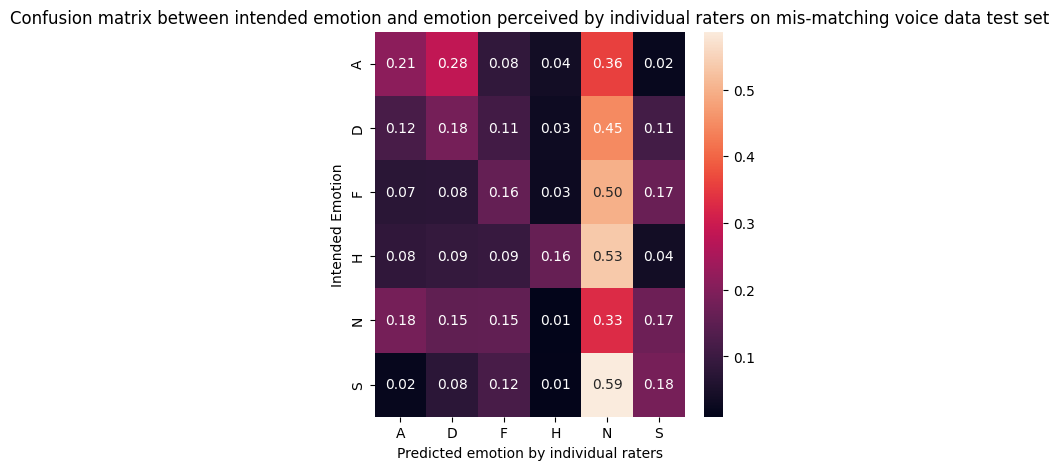

In [33]:
voice_mismatch_responses = voice_responses.loc[voice_responses.clipName.isin(combined_voice_votes_incorrect.fileName)]
y_true_voice_mismatch = list(voice_mismatch_responses.dispEmo)
y_pred_voice_mismatch = list(voice_mismatch_responses.respEmo)

plot_cm(
    y_true_voice_mismatch,
    y_pred_voice_mismatch,
    TARGET_NAMES,
    "Confusion matrix between intended emotion and emotion perceived by individual raters on mis-matching voice data test set"
)

/tmp/ipykernel_2285501/995340082.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_voice_cm / all_voice_cm.astype(np.float).sum(axis=1)


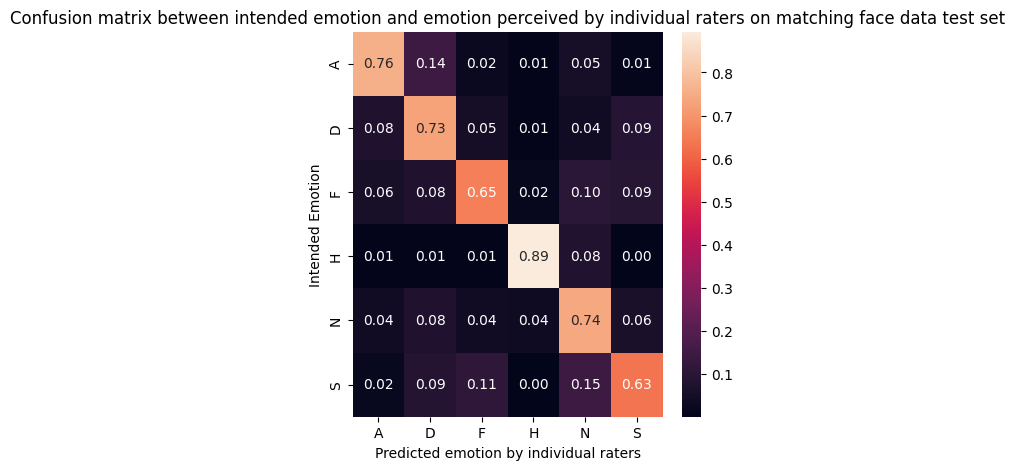

Human accuracy on matching face data test set is 0.7591022443890274


In [34]:
face_match_test = pd.read_pickle("./face_test.pkl")
face_match_test_files = list(face_match_test.fileName)
face_match_test_responses = face_responses.loc[face_responses.clipName.isin(face_match_test_files)]


y_true_all = list(face_match_test_responses.dispEmo)
y_pred_all = list(face_match_test_responses.respEmo)
target_names = list(set(y_true_all_voice))

plot_cm(
    y_true_all,
    y_pred_all,
    TARGET_NAMES,
    "Confusion matrix between intended emotion and emotion perceived by individual raters on matching face data test set"
)

face_match_test_acc = human_acc_on_clips(
    face_match_test_files,
    2,
    finished_responses_repeats_df
)

print(f'Human accuracy on matching face data test set is {face_match_test_acc}')

/tmp/ipykernel_2285501/995340082.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_voice_cm / all_voice_cm.astype(np.float).sum(axis=1)


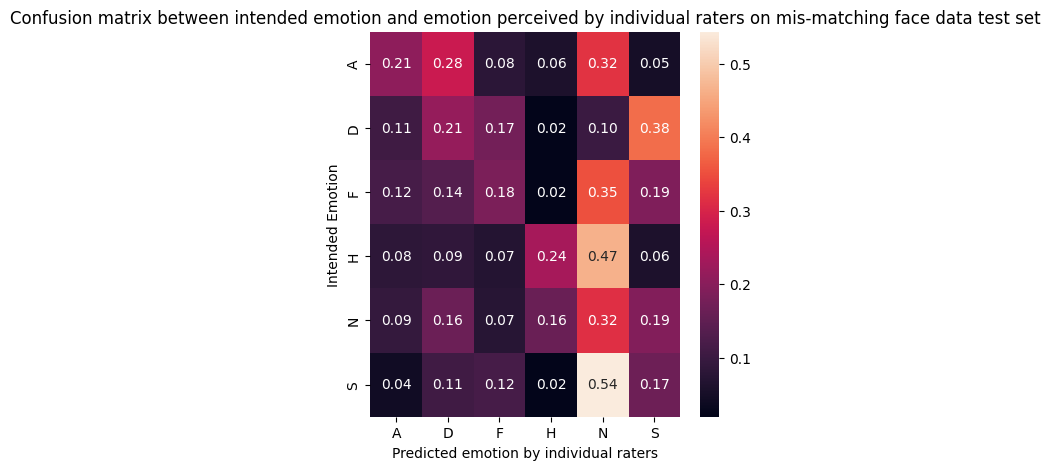

In [35]:
face_mismatch_responses = face_responses.loc[face_responses.clipName.isin(combined_face_votes_incorrect.fileName)]
y_true_face_mismatch = list(face_mismatch_responses.dispEmo)
y_pred_face_mismatch = list(face_mismatch_responses.respEmo)

plot_cm(
    y_true_face_mismatch,
    y_pred_face_mismatch,
    TARGET_NAMES,
    "Confusion matrix between intended emotion and emotion perceived by individual raters on mis-matching face data test set"
)

#### Verficiation of paper's claim of binomial majority confusion matrix

In [36]:
TABULATED_VOTES_PATH = "./CREMA-D/processedResults/tabulatedVotes.csv"
tabulated_votes_df = pd.read_csv(TABULATED_VOTES_PATH)
tabulated_votes_df

,Unnamed: 0,A,D,F,H,N,S,fileName,numResponses,agreement,...,meanSadResp,medianEmoResp,meanEmoRespNorm,meanAngerRespNorm,meanDisgustRespNorm,meanFearRespNorm,meanHappyRespNorm,meanNeutralRespNorm,meanSadRespNorm,medianEmoRespNorm
0,100001,0,0,0,1,10,0,1001_IEO_NEU_XX,11,0.909091,...,-1.0,87.0,66.171320,-1.000000,-1.000000,-1.000000,97.894737,62.998978,-1.000000,83.333333
1,100002,0,0,0,3,6,0,1001_IEO_HAP_LO,9,0.666667,...,-1.0,72.0,53.816160,-1.000000,-1.000000,-1.000000,36.292735,62.577873,-1.000000,53.846154
2,100003,0,0,0,4,7,0,1001_IEO_HAP_MD,11,0.636364,...,-1.0,60.0,61.874713,-1.000000,-1.000000,-1.000000,55.165230,65.708703,-1.000000,61.111111
3,100004,2,0,0,6,2,0,1001_IEO_HAP_HI,10,0.600000,...,-1.0,69.5,52.927309,84.420185,-1.000000,-1.000000,56.542708,10.588235,-1.000000,66.308140
4,100005,1,1,0,0,7,1,1001_IEO_SAD_LO,10,0.700000,...,6.0,80.0,59.486728,12.941176,94.936709,-1.000000,-1.000000,69.123485,3.125000,75.182073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22321,307438,0,0,0,10,0,0,1091_WSI_HAP_XX,10,1.000000,...,-1.0,57.0,62.391370,-1.000000,-1.000000,-1.000000,62.391370,-1.000000,-1.000000,58.307858
22322,307439,0,0,0,0,5,4,1091_WSI_SAD_XX,9,0.555556,...,69.0,62.0,53.971355,-1.000000,-1.000000,-1.000000,-1.000000,46.816122,62.915396,58.536585
22323,307440,9,1,0,0,0,0,1091_WSI_ANG_XX,10,0.900000,...,-1.0,67.5,65.129996,63.142343,83.018868,-1.000000,-1.000000,-1.000000,-1.000000,66.035088
22324,307441,0,0,7,0,2,0,1091_WSI_FEA_XX,9,0.777778,...,-1.0,53.0,52.685539,-1.000000,-1.000000,43.821883,-1.000000,83.708333,-1.000000,56.521739


In [37]:
sum(combined_voice_votes_correct.loc[combined_voice_votes_correct.intendedEmo=="A"].numResponses)# + sum(combined_voice_votes_incorrect.loc[combined_voice_votes_incorrect.intendedEmo=="A"].numResponses)

7232

## Calculate classficiation report

In [38]:
print("Classification report on test set for matching face data")
print(classification_report(y_true_all, y_pred_all, target_names=TARGET_NAMES))

Classification report on test set for matching face data
              precision    recall  f1-score   support

           A       0.80      0.76      0.78      1364
           D       0.67      0.73      0.70      1313
           F       0.73      0.65      0.69      1063
           H       0.95      0.89      0.92      1970
           N       0.71      0.74      0.72      1623
           S       0.56      0.63      0.59       687

    accuracy                           0.76      8020
   macro avg       0.74      0.74      0.73      8020
weighted avg       0.77      0.76      0.76      8020



In [39]:
print("Classification report on test set for matching voice data")
print(classification_report(y_true_voice_match, y_pred_voice_match, target_names=TARGET_NAMES))

Classification report on test set for matching voice data
              precision    recall  f1-score   support

           A       0.83      0.71      0.77      1674
           D       0.44      0.56      0.50       724
           F       0.67      0.66      0.67       874
           H       0.79      0.61      0.69       725
           N       0.73      0.77      0.75      2245
           S       0.47      0.57      0.52       462

    accuracy                           0.69      6704
   macro avg       0.66      0.65      0.65      6704
weighted avg       0.71      0.69      0.69      6704



In [40]:
print("Classification report on test set for mis-matching voice data")
print(classification_report(y_true_voice_mismatch, y_pred_voice_mismatch, target_names=TARGET_NAMES))

Classification report on test set for mis-matching voice data
              precision    recall  f1-score   support

           A       0.28      0.21      0.24      5420
           D       0.31      0.18      0.23     10019
           F       0.27      0.16      0.20      9330
           H       0.64      0.16      0.26     10179
           N       0.01      0.33      0.01       513
           S       0.39      0.18      0.25     11478

    accuracy                           0.18     46939
   macro avg       0.32      0.21      0.20     46939
weighted avg       0.39      0.18      0.23     46939



In [41]:
print("Classification report on test set for mis-matching face data")
print(classification_report(y_true_face_mismatch, y_pred_face_mismatch, target_names=TARGET_NAMES))

Classification report on test set for mis-matching face data
              precision    recall  f1-score   support

           A       0.35      0.21      0.26      4759
           D       0.24      0.21      0.22      4987
           F       0.34      0.18      0.24      6657
           H       0.14      0.24      0.18       604
           N       0.03      0.32      0.06       968
           S       0.29      0.17      0.21      9087

    accuracy                           0.19     27062
   macro avg       0.23      0.22      0.19     27062
weighted avg       0.29      0.19      0.22     27062



## Distribution of data in train and test sets

### Visual

In [42]:
combined_face_votes_correct.intendedEmo.value_counts()

H    1216
N     998
A     831
D     806
F     656
S     424
Name: intendedEmo, dtype: int64

In [43]:
labelencoder = pd.read_pickle("label_encoder.pkl")

pd.Series(
    face_match_test.intendedEmo.value_counts().values,
    labelencoder.inverse_transform(face_match_test.intendedEmo.value_counts().index)
)

H    182
N    150
A    125
D    121
F     99
S     63
dtype: int64

In [44]:
combined_face_votes_incorrect.intendedEmo.value_counts()

S    847
F    615
D    465
A    440
N     89
H     55
Name: intendedEmo, dtype: int64

### Audio

In [45]:
combined_voice_votes_correct.intendedEmo.value_counts()

N    1040
A     770
F     407
D     343
H     330
S     209
Name: intendedEmo, dtype: int64

In [46]:
voice_match_test.intendedEmo.value_counts()

N    208
A    154
F     81
D     69
H     66
S     42
Name: intendedEmo, dtype: int64

In [47]:
combined_voice_votes_incorrect.intendedEmo.value_counts()

S    1062
H     941
D     928
F     864
A     501
N      47
Name: intendedEmo, dtype: int64

For both, notice the reverse pattern in distribution of classes in matching vs non-matching data.

For visual, there are very few training instances for sad and neutral, whereas for the non-matching test set, the majority are sad and neutral

For audio, there are very few training instances for sad and happy, disgust and fear (least to most) whereas in the non-matching test set there are a negiligible amount of test data for neutral.

### Check how many items participants have votes

In [71]:
all_local_ids = set(face_responses.localid)

In [ ]:
for i in all_local_ids:
    if len(face_responses.loc[face_responses.localid==i]) != 35:
        print(i, len(face_responses.loc[face_responses.localid==i]))


SSI_1079225690 34
SSI_1098660938 24
SSI_1146668401 34
SSI_1143563948 33
SSI_1106134716 32
SSI_1132141436 34
SSI_1125244677 34
SSI_1079123041 34
SSI_1136550844 34
SSI_1125536314 14
SSI_1160269112 34
SSI_1082469068 34
SSI_1129499283 34
SSI_1150501534 34
SSI_1121558943 36
SSI_1131989004 34
SSI_1163323107 34
SSI_1131891996 34
SSI_1158002439 34
SSI_1123289069 34
SSI_1131963769 34
